## Runs DE on different clusters. Also runs DE within each cluster for each condition

In [1]:
rm_clust = "13,16,15"
integrated_f = "/data2/mito_lineage/output/annotation/data/TcellDupi_may17_2021/MTblacklist/mergedSamples/allSamples.integrated.rds"
outdir = "/data2/mito_lineage/output/annotation/data/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust/" 
sample_names = "pre,post"
nTop = 25000
assay="RNA"
cores = 4
comps_f = ""
#cond.comparisons <- "A,preA,postA;B,preB,postB"

In [2]:
clust_outdir = file.path(outdir, "clusters")
clust_atac_outdir = file.path(outdir, "clusters_atac")
cond_outdir = file.path(outdir, "conditions_clusters")
cons_outdir = file.path(outdir, "conditions_conserved")
dir.create(outdir, showWarnings = FALSE)
dir.create(clust_outdir, showWarnings = FALSE)
dir.create(cond_outdir, showWarnings = FALSE)
dir.create(cons_outdir, showWarnings = FALSE)
dir.create(clust_atac_outdir, showWarnings = FALSE)

In [3]:
sample_names <- unlist(strsplit(sample_names, ",")[[1]])
#samples <- unlist(strsplit(samples, ","))

rm_clust <- unlist(strsplit(rm_clust, ",")[[1]])

sample_names

[1] "pre"  "post"

In [4]:
rm_clust

[1] "13" "16" "15"

In [5]:
library(GenomicRanges)
library(Seurat)
library(Signac)
library(GenomeInfoDb)
library(EnsDb.Hsapiens.v75)
library(ggplot2)
library(patchwork)
set.seed(1234)
library(data.table)
library(magrittr)
library(cowplot)
library(metap)
library("RColorBrewer")

library(future)
plan()

plan("multiprocess", workers = cores)
#options(future.globals.maxSize = 50000 * 1024^2) # for 50 Gb RAM
options(future.globals.maxSize = 8000 * 1024^2)

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The follow

sequential:
- args: function (..., envir = parent.frame())
- tweaked: FALSE
- call: NULL

Warning message:
"Strategy 'multiprocess' is deprecated in future (>= 1.20.0). Instead, explicitly specify either 'multisession' or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'."


In [6]:
integrated_f

[1] "/data2/mito_lineage/output/annotation/data/TcellDupi_may17_2021/MTblacklist/mergedSamples/allSamples.integrated.rds"

In [7]:
integrated <- readRDS(integrated_f)#file.path(indir, paste0("allSamples.integrated.rds")))
integrated

An object of class Seurat 
98240 features across 22654 samples within 2 assays 
Active assay: RNA (20010 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

In [8]:
integrated[['peak_region_fragments']]

,peak_region_fragments
,<dbl>
pre_AAACGAAAGCCGCAAA-1,6406
pre_AAACGAAAGGCTCCTG-1,2147
pre_AAACGAAAGTACCTCA-1,213
pre_AAACGAAAGTAGCAAT-1,3864
pre_AAACGAAAGTGAATAC-1,1854
pre_AAACGAAAGTGTCACT-1,5456
pre_AAACGAACACGGCCAT-1,2480
pre_AAACGAACACTCGTGG-1,610
pre_AAACGAACATAGGCGA-1,4378


In [9]:
integrated[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,promoter_region_fragments,on_target_fragments,blacklist_region_fragments,peak_region_fragments,peak_region_cutsites,proj,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<dbl>,<int>
pre_AAACGAAAGCCGCAAA-1,pre,4794,4794,38802,9366,247,213,1646,18980,8350,⋯,0,4636,0,6406,12677,pre,7,7,4483,2810
pre_AAACGAAAGGCTCCTG-1,pre,1887,1887,15412,2697,66,65,444,8994,3146,⋯,0,1607,0,2147,4240,pre,6,6,1593,1336
pre_AAACGAAAGTACCTCA-1,pre,207,207,1019,177,5,7,54,461,315,⋯,0,147,0,213,423,pre,3,3,166,162
pre_AAACGAAAGTAGCAAT-1,pre,3068,3068,19828,5489,201,117,859,8209,4953,⋯,0,2750,0,3864,7644,pre,9,9,2563,1829
pre_AAACGAAAGTGAATAC-1,pre,1686,1686,11328,2048,58,40,407,6141,2634,⋯,0,1130,0,1854,3656,pre,9,9,1389,1195
pre_AAACGAAAGTGTCACT-1,pre,4229,4229,26680,9152,251,163,1499,7181,8434,⋯,0,4282,0,5456,10729,pre,8,8,4425,2949
pre_AAACGAACACGGCCAT-1,pre,2054,2054,16145,3572,88,91,684,8514,3196,⋯,0,1876,0,2480,4911,pre,2,2,1698,1328
pre_AAACGAACACTCGTGG-1,pre,562,562,3653,432,6,11,139,2203,862,⋯,0,439,0,610,1198,pre,11,11,439,407
pre_AAACGAACATAGGCGA-1,pre,3548,3548,34697,8294,154,194,1261,18482,6312,⋯,0,3058,0,4378,8631,pre,1,1,3281,2348


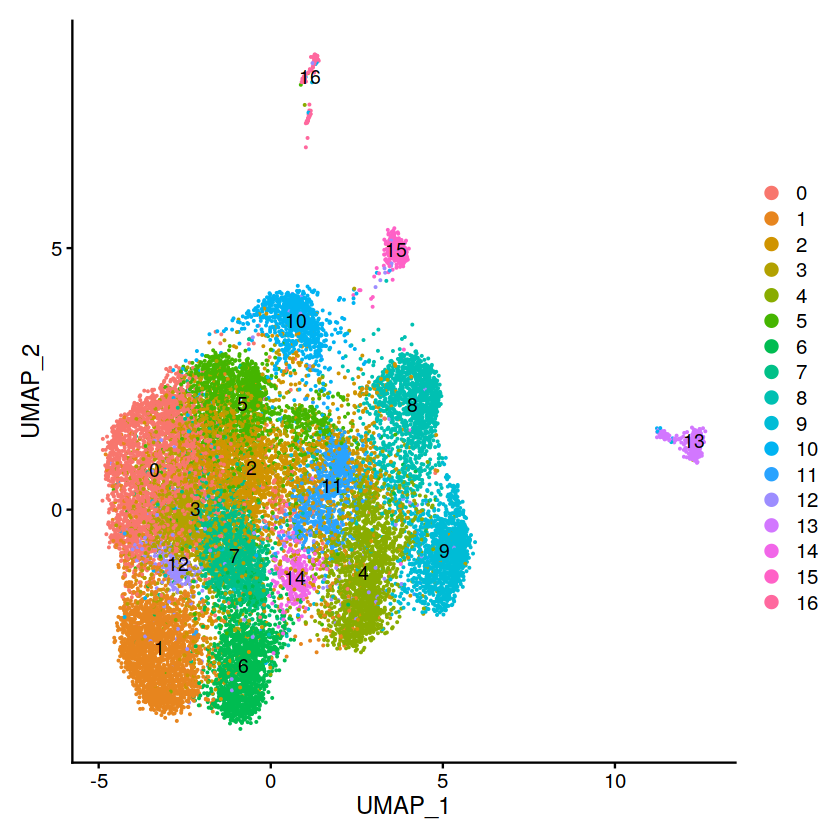

In [10]:
pclust <- DimPlot(object = integrated, label = TRUE) 
pclust

In [11]:
integrated$log.ten.total <- log10(integrated$total)
integrated$log10_on_target_fragments <- log10(integrated$on_target_fragments)

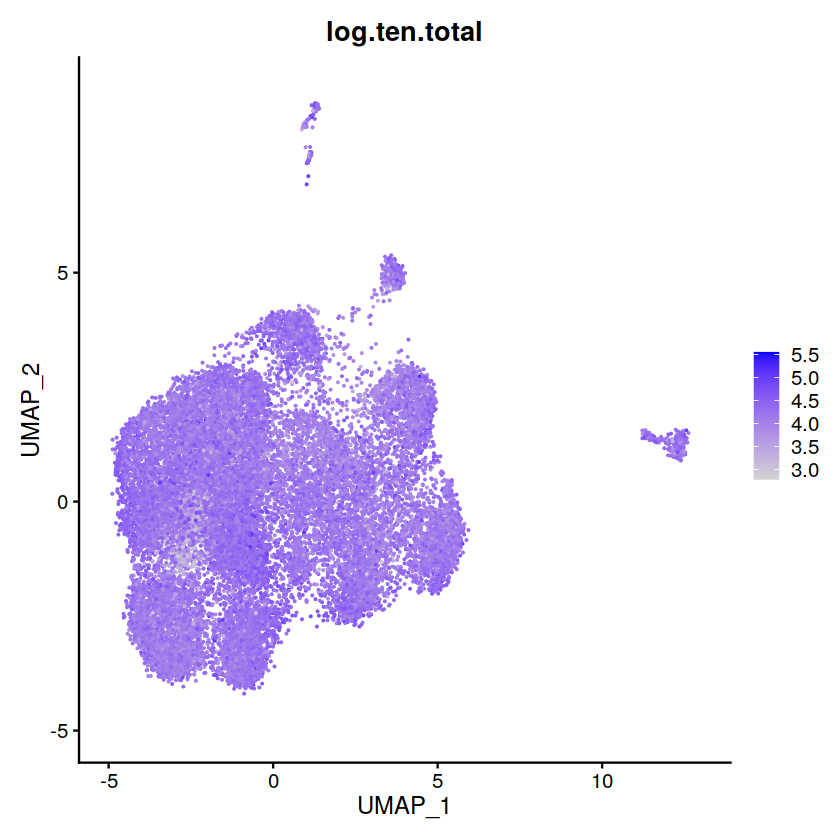

In [12]:
FeaturePlot(integrated, features="log.ten.total", label=F)

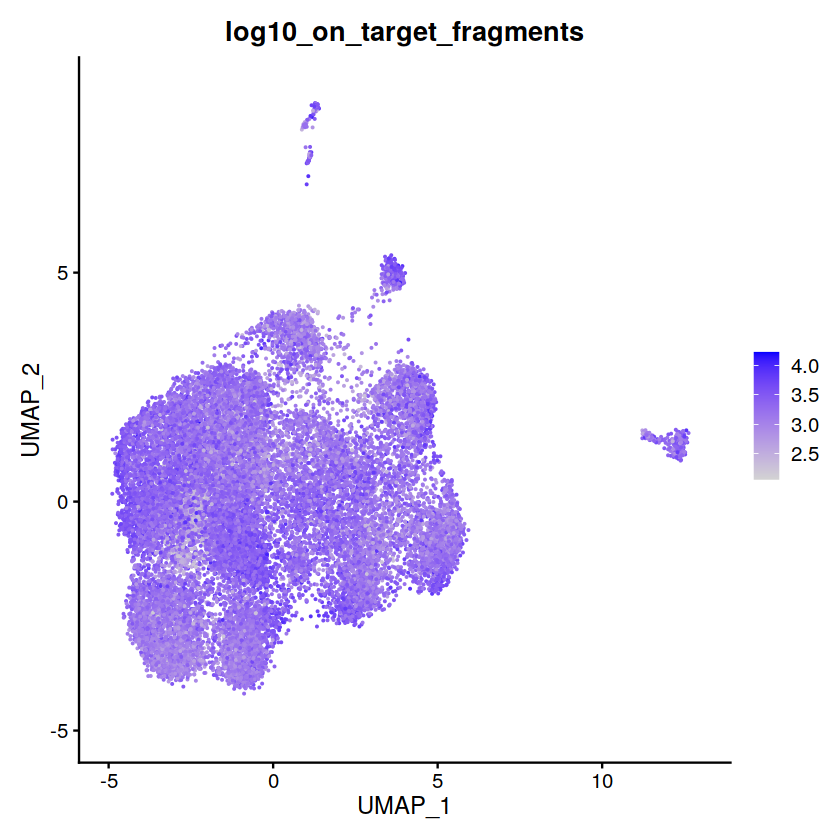

In [13]:
FeaturePlot(integrated, features="log10_on_target_fragments", label=F)

## Remove clusters and re-run UMAP + DE

In [14]:
integrated <- subset(integrated, idents = rm_clust, invert=TRUE)

In [15]:
integrated

An object of class Seurat 
98240 features across 21901 samples within 2 assays 
Active assay: RNA (20010 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

In [16]:
# Binarize and run LSI
integrated <- FindTopFeatures(integrated, min.cutoff = 20)
integrated <- BinarizeCounts(integrated)
integrated <- RunTFIDF(integrated)
integrated <- RunSVD(integrated)
integrated <- RunUMAP(integrated, dims = 2:30, reduction = 'lsi')


Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
"Some features contain 0 total counts"
Running SVD

Scaling cell embeddings

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
19:23:05 UMAP embedding parameters a = 0.9922 b = 1.112

19:23:05 Read 21901 rows and found 29 numeric columns

19:23:05 Using Annoy for neighbor search, n_neighbors = 30

19:23:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:23:08 Writing NN index file to temp file /tmp/RtmpICIba5

Computing nearest neighbor graph

Computing SNN

Warning message:
"UNRELIABLE VALUE: One of the 'future.apply' iterations ('future_lapply-1') unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore"."


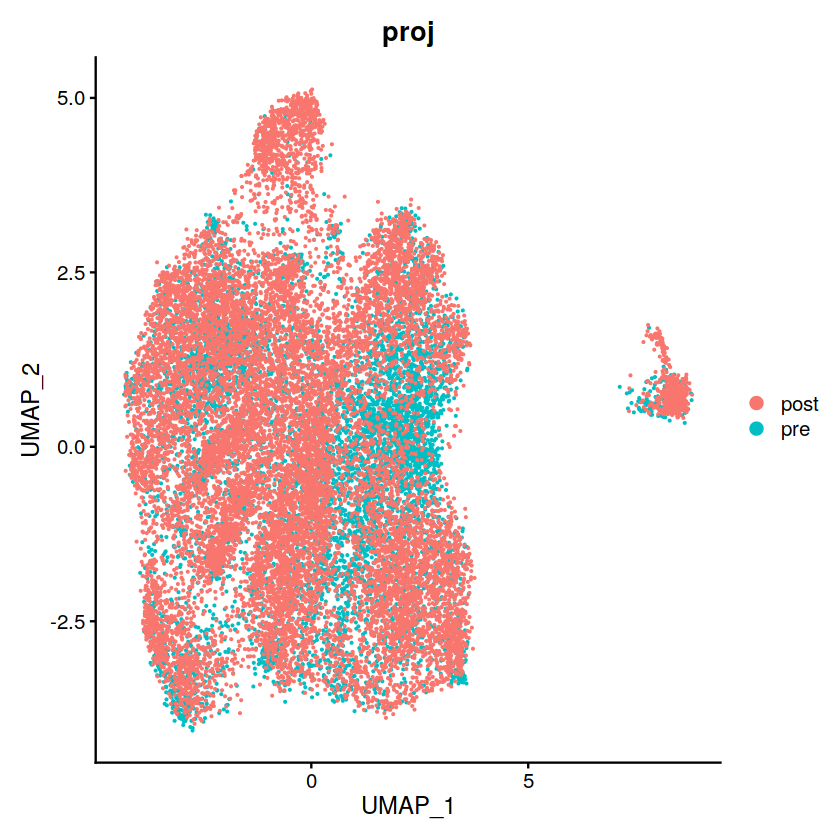

In [17]:
integrated <- FindNeighbors(object = integrated, reduction = 'lsi', dims = 2:30)
integrated <- FindClusters(object = integrated, verbose = FALSE, algorithm = 3)

DimPlot(integrated, group.by = "proj", pt.size = 0.1)

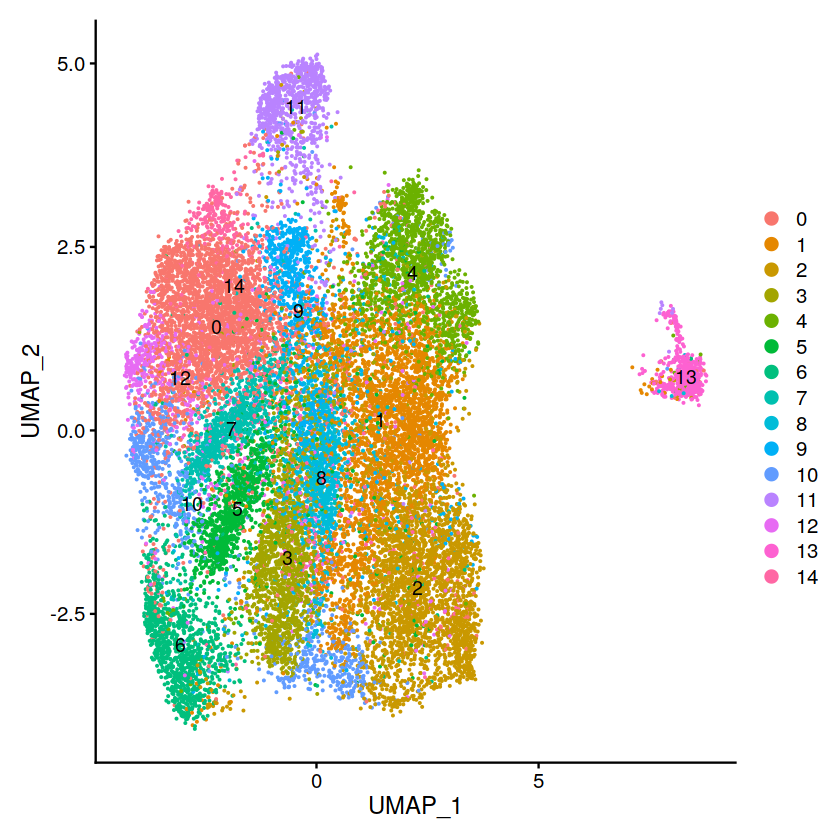

In [18]:
pclust <- DimPlot(object = integrated, label = TRUE) 
pclust

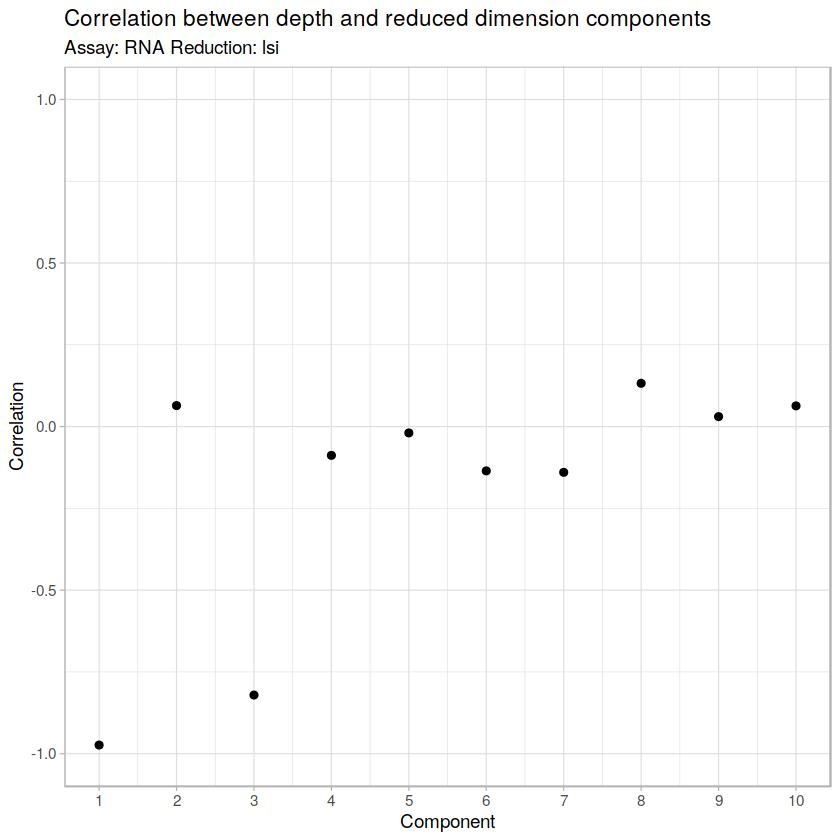

In [19]:
pDepthCorr <- DepthCor(integrated)
pDepthCorr

## Compute DE for each cluster

In [18]:
plotDE <- function(integrated, de.results, i, outdir){
    try
    {
    plot1 <- VlnPlot(
      object = integrated,
      features = rownames(de.results)[1],
      pt.size = 0.1,
      idents = i
    )
    plot2 <- FeaturePlot(
      object = integrated,
      features = rownames(de.results)[1],
      pt.size = 0.1
    )

    plot3 <- FeaturePlot(
      object = integrated,
      features = rownames(de.results)[2],
      pt.size = 0.1
    )
    
    plot1 | plot2 | plot3
    
    ggsave(file.path(outdir,paste0("cluster_",i,".DE.GeneActivity.top2.png")))
    
    return(c(plot1, plot2, plot3))
    }
    return
}

## Loop through each cluster and run DA for RNA-seq

In [19]:
cluster.ids <- sort(unique(integrated$seurat_clusters))
for (i in cluster.ids){ #or however many clusters you have
try({
    print(paste("cluster", i))
    da.peaks <- FindMarkers(
                  object = integrated,
                  ident.1 = i, #"CD4 Naive",
                  min.pct = 0.1,
                  test.use = 'LR', latent.vars = 'peak_region_fragments'
                )
    print(file.path(clust_outdir, paste0("cluster_",i,".DE.GeneActivity.csv")))
    print(head(da.peaks))
    write.csv(da.peaks, file=file.path(clust_outdir, paste0("cluster_",i,".DE.GeneActivity.csv")))
    print(paste('saved cluster', i))
    plotDE(integrated, da.peaks, i, clust_outdir)
    print(paste('plotted cluster', i))
    
})
}

[1] "cluster 0"
[1] "/data2/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust//clusters/cluster_0.DE.GeneActivity.csv"
                    p_val avg_log2FC pct.1 pct.2     p_val_adj
FUT5         0.000000e+00  -2.232034 0.059 0.507  0.000000e+00
AC024592.12  0.000000e+00  -2.232034 0.059 0.507  0.000000e+00
NDUFA11      0.000000e+00  -2.355954 0.052 0.500  0.000000e+00
AC104532.2   0.000000e+00  -2.315014 0.054 0.501  0.000000e+00
VMAC         0.000000e+00  -2.334753 0.053 0.500  0.000000e+00
TMEM256     5.655987e-254  -2.227221 0.052 0.441 1.131763e-249
[1] "saved cluster 0"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 0"
[1] "cluster 1"
[1] "/data2/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust//clusters/cluster_1.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2    p_val_adj
ZNF235   1.059895e-20  0.3245519 0.640 0.264 2.120850e-16
GNG2     7.401425e-19 -0.5876203 0.397 0.307 1.481025e-14
STARD3NL 4.337195e-18 -0.5671535 0.236 0.176 8.678727e-14
TNC      1.148301e-17 -0.6793261 0.132 0.107 2.297751e-13
EHF      3.709597e-17 -0.6498260 0.121 0.098 7.422903e-13
STK32A   9.534205e-17 -0.5500057 0.181 0.135 1.907794e-12
[1] "saved cluster 1"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 1"
[1] "cluster 2"
[1] "/data2/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust//clusters/cluster_2.DE.GeneActivity.csv"
       p_val avg_log2FC pct.1 pct.2 p_val_adj
PCDHA1     0   2.063796 0.996 0.303         0
PCDHA2     0   2.077414 0.996 0.301         0
PCDHA3     0   2.852271 0.995 0.187         0
PCDHA4     0   2.886376 0.995 0.183         0
PCDHA5     0   2.919831 0.995 0.179         0
PCDHA6     0   2.931037 0.995 0.178         0
[1] "saved cluster 2"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 2"
[1] "cluster 3"
[1] "/data2/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust//clusters/cluster_3.DE.GeneActivity.csv"
                    p_val avg_log2FC pct.1 pct.2     p_val_adj
FUT5         0.000000e+00   1.995247 0.995 0.387  0.000000e+00
AC024592.12  0.000000e+00   1.995247 0.995 0.387  0.000000e+00
NDUFA11      0.000000e+00   2.025099 0.995 0.380  0.000000e+00
AC104532.2   0.000000e+00   2.020802 0.994 0.380  0.000000e+00
VMAC         0.000000e+00   2.027077 0.994 0.379  0.000000e+00
TMEM256     4.236275e-173  -1.981646 0.059 0.407 8.476786e-169
[1] "saved cluster 3"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 3"
[1] "cluster 4"
[1] "/data2/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust//clusters/cluster_4.DE.GeneActivity.csv"
                      p_val avg_log2FC pct.1 pct.2    p_val_adj
TSSK6          0.000000e+00  3.8900602 0.546 0.048 0.000000e+00
NDUFA13        0.000000e+00  3.5996195 0.993 0.105 0.000000e+00
CTC-260F20.3   0.000000e+00  3.5981071 0.995 0.105 0.000000e+00
YJEFN3         0.000000e+00  3.5899297 0.995 0.106 0.000000e+00
CTD-3105H18.18 2.330858e-15  0.4373657 0.271 0.198 4.664048e-11
CTD-3105H18.16 2.236313e-14  0.4473244 0.259 0.189 4.474863e-10
[1] "saved cluster 4"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 4"
[1] "cluster 5"
[1] "/data2/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust//clusters/cluster_5.DE.GeneActivity.csv"
                      p_val avg_log2FC pct.1 pct.2     p_val_adj
TMEM14B        0.000000e+00   2.639919 0.977 0.241  0.000000e+00
RP11-637O19.3  0.000000e+00   2.578141 0.998 0.257  0.000000e+00
SYCP2L         0.000000e+00   2.500185 0.999 0.269  0.000000e+00
MAK            0.000000e+00   2.949803 0.528 0.100  0.000000e+00
AC104532.2    3.084198e-139  -2.008802 0.069 0.450 6.171479e-135
VMAC          2.281443e-138  -2.006184 0.069 0.448 4.565166e-134
[1] "saved cluster 5"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 5"
[1] "cluster 6"
[1] "/data2/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust//clusters/cluster_6.DE.GeneActivity.csv"
                 p_val avg_log2FC pct.1 pct.2     p_val_adj
HNF1B     0.000000e+00   3.566015 0.438 0.031  0.000000e+00
APMAP    5.591855e-210   2.080975 0.509 0.114 1.118930e-205
STARD3NL 5.501827e-193   1.683041 0.581 0.164 1.100916e-188
SYNRG    4.040588e-167   2.021947 0.433 0.098 8.085217e-163
JAKMIP1  8.936662e-152   2.097957 0.378 0.078 1.788226e-147
STOX1    3.786602e-143   2.006668 0.401 0.100 7.576991e-139
[1] "saved cluster 6"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 6"
[1] "cluster 7"
[1] "/data2/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust//clusters/cluster_7.DE.GeneActivity.csv"
                        p_val avg_log2FC pct.1 pct.2     p_val_adj
TMEM256-PLSCR3   0.000000e+00   2.262028 0.997 0.368  0.000000e+00
C17orf61-PLSCR3  0.000000e+00   2.262028 0.997 0.368  0.000000e+00
TMEM256          0.000000e+00   2.323907 0.988 0.349  0.000000e+00
NLGN2            0.000000e+00   2.173222 0.988 0.382  0.000000e+00
NDUFA11         3.653732e-167  -2.589862 0.018 0.449 7.311119e-163
AC104532.2      1.305565e-166  -2.597471 0.019 0.450 2.612436e-162
[1] "saved cluster 7"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 7"
[1] "cluster 8"
[1] "/data2/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust//clusters/cluster_8.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2 p_val_adj
TMEM256-PLSCR3      0   1.486679 0.984 0.369         0
C17orf61-PLSCR3     0   1.486679 0.984 0.369         0
TMEM256             0   1.547994 0.971 0.350         0
NLGN2               0   1.421945 0.980 0.383         0
FUT5                0   1.332518 0.989 0.408         0
AC024592.12         0   1.332518 0.989 0.408         0
[1] "saved cluster 8"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 8"
[1] "cluster 9"
[1] "/data2/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust//clusters/cluster_9.DE.GeneActivity.csv"
                    p_val avg_log2FC pct.1 pct.2    p_val_adj
SLCO1B3      0.000000e+00   3.106031 0.976 0.162 0.000000e+00
LST3         0.000000e+00   3.129002 0.975 0.160 0.000000e+00
SLCO1B7      0.000000e+00   3.120042 0.975 0.160 0.000000e+00
RP11-125O5.2 9.768623e-60   1.774480 0.233 0.083 1.954701e-55
PCDHA11      3.079905e-46  -1.671052 0.064 0.267 6.162890e-42
PCDHA12      3.625425e-46  -1.707117 0.059 0.258 7.254475e-42
[1] "saved cluster 9"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 9"
[1] "cluster 10"
[1] "/data2/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust//clusters/cluster_10.DE.GeneActivity.csv"
                     p_val avg_log2FC pct.1 pct.2     p_val_adj
RHBDD1       3.451344e-119   1.791514 0.406 0.113 6.906140e-115
ESR2         6.906764e-116   1.363686 0.532 0.200 1.382043e-111
DMRTC1        1.467660e-98   1.295790 0.480 0.180  2.936788e-94
LPA           4.735787e-89   1.225734 0.501 0.215  9.476309e-85
B3GALTL       5.419297e-81   1.633299 0.327 0.099  1.084401e-76
RP11-12J10.3  6.105406e-81   1.991651 0.259 0.063  1.221692e-76
[1] "saved cluster 10"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 10"
[1] "cluster 11"
[1] "/data2/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust//clusters/cluster_11.DE.GeneActivity.csv"
                p_val avg_log2FC pct.1 pct.2     p_val_adj
TRDN    3.485745e-151   1.342288 0.648 0.241 6.974975e-147
FAM172A 2.922582e-148   1.442457 0.607 0.219 5.848086e-144
TMTC2   1.458981e-144   1.414844 0.613 0.228 2.919422e-140
SLC4A4  5.231515e-139   1.593993 0.527 0.170 1.046826e-134
DACH1   3.336065e-138   1.366061 0.602 0.220 6.675466e-134
BNC2    3.876259e-138   1.585162 0.522 0.169 7.756394e-134
[1] "saved cluster 11"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 11"
[1] "cluster 12"
[1] "/data2/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust//clusters/cluster_12.DE.GeneActivity.csv"
                  p_val avg_log2FC pct.1 pct.2    p_val_adj
TXNL4B     0.000000e+00   2.905901 0.967 0.216 0.000000e+00
HP         0.000000e+00   2.997352 0.955 0.200 0.000000e+00
HPR        0.000000e+00   2.963508 0.965 0.207 0.000000e+00
AC104532.2 3.388317e-32  -1.230307 0.152 0.437 6.780022e-28
VMAC       6.678483e-32  -1.226784 0.152 0.436 1.336364e-27
NDUFA11    2.081298e-31  -1.212320 0.153 0.437 4.164677e-27
[1] "saved cluster 12"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 12"
[1] "cluster 13"
[1] "/data2/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust//clusters/cluster_13.DE.GeneActivity.csv"
        p_val avg_log2FC pct.1 pct.2 p_val_adj
PCDHGA1     0   2.305940     1 0.178         0
PCDHGA2     0   4.447474     1 0.039         0
PCDHGA3     0   4.842003     1 0.028         0
PCDHGB1     0   6.502474     1 0.008         0
PCDHGA4     0   6.726124     1 0.006         0
PCDHGB2     0   6.857336     1 0.005         0
[1] "saved cluster 13"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 13"
[1] "cluster 14"
[1] "/data2/isshamie/mito_lineage/output/annotation/TcellDupi_may17_2021/MTblacklist/mergedSamples/DErmClust//clusters/cluster_14.DE.GeneActivity.csv"
                      p_val avg_log2FC pct.1 pct.2    p_val_adj
SOHLH2         0.000000e+00   3.282739 0.990 0.161 0.000000e+00
CCDC169-SOHLH2 0.000000e+00   3.284408 0.990 0.161 0.000000e+00
CCDC169        0.000000e+00   3.367085 0.962 0.145 0.000000e+00
CTD-3105H18.16 1.658683e-21  -1.401382 0.031 0.198 3.319025e-17
ZNF443         2.678081e-20  -1.379145 0.029 0.188 5.358840e-16
CTD-3105H18.18 7.760081e-18  -1.175134 0.044 0.207 1.552792e-13
[1] "saved cluster 14"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 14"


## Loop through each cluster and run DA for ATAC-seq

In [20]:
DefaultAssay(integrated) <- "ATAC"
cluster.ids <- sort(unique(integrated$seurat_clusters))
for (i in cluster.ids){ #or however many clusters you have
try({
    print(paste("cluster", i))
    da.peaks <- FindMarkers(
                  object = integrated,
                  ident.1 = i, #"CD4 Naive",
                  min.pct = 0.1,
                  test.use = 'LR', latent.vars = 'peak_region_fragments'
                )
    print(head(da.peaks))
    write.csv(da.peaks, file=file.path(clust_atac_outdir, paste0("cluster_",i,".DE.PeakActivity.csv")))
    print(paste('saved cluster', i))
    plotDE(integrated, da.peaks, i, clust_atac_outdir)
    print(paste('plotted cluster', i))
    
})
}

# put back to RNA
DefaultAssay(integrated) <- "RNA"


[1] "cluster 0"
                                p_val avg_log2FC pct.1 pct.2     p_val_adj
chr19-5903312-5905554    0.000000e+00 -0.9433315 0.051 0.498  0.000000e+00
chr17-7306473-7310043   6.564733e-256 -0.8643373 0.053 0.442 5.135590e-251
chr6-10746668-10748519   3.245366e-97 -0.5873375 0.025 0.199  2.538849e-92
chr16-72092868-72094680  2.903422e-63 -0.5249443 0.064 0.247  2.271347e-58
chr6-10837151-10839326   2.433571e-59 -0.4272969 0.006 0.100  1.903782e-54
chr13-36818198-36821560  7.046449e-43 -0.4252164 0.033 0.148  5.512437e-38
[1] "saved cluster 0"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 0"
[1] "cluster 1"
                                p_val avg_log2FC pct.1 pct.2    p_val_adj
chr1-226686202-226695761 1.588865e-25  0.5867077 0.280 0.066 1.242969e-20
chr17-7306473-7310043    3.842742e-24  0.4041582 0.714 0.318 3.006177e-19
chr19-5903312-5905554    3.294924e-21  0.3383342 0.749 0.367 2.577619e-16
chr20-43721743-43722990  1.179832e-19  0.4621737 0.190 0.051 9.229825e-15
chr8-1759691-1761291     9.846705e-19  0.4923498 0.181 0.042 7.703077e-14
chr6-22145791-22150261   1.904942e-16  0.3978276 0.132 0.033 1.490236e-11
[1] "saved cluster 1"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 1"
[1] "cluster 2"
                                 p_val avg_log2FC pct.1 pct.2     p_val_adj
chr5-140302523-140303832 5.094231e-314  0.8287643 0.250 0.044 3.985217e-309
chr5-140357335-140358289 4.557155e-125  0.5126006 0.105 0.017 3.565063e-120
[1] "saved cluster 2"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 2"
[1] "cluster 3"
                              p_val avg_log2FC pct.1 pct.2     p_val_adj
chr19-5903312-5905554  0.000000e+00   1.017286 0.994 0.377  0.000000e+00
chr17-7306473-7310043 2.387932e-171  -0.777639 0.060 0.408 1.868079e-166
[1] "saved cluster 3"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 3"
[1] "cluster 4"
                        p_val avg_log2FC pct.1 pct.2 p_val_adj
chr19-19627258-19629765     0   1.452623 0.542 0.047         0
chr19-19642370-19644293     0   1.166627 0.423 0.058         0
[1] "saved cluster 4"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 4"
[1] "cluster 5"
                               p_val avg_log2FC pct.1 pct.2     p_val_adj
chr6-10746668-10748519 7.802861e-253  0.9453557 0.505 0.153 6.104178e-248
chr6-10837151-10839326 4.125137e-231  0.9900749 0.359 0.070 3.227094e-226
chr19-5903312-5905554  2.164380e-138 -0.8114414 0.067 0.446 1.693195e-133
[1] "saved cluster 5"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 5"
[1] "cluster 6"
                                  p_val avg_log2FC pct.1 pct.2     p_val_adj
chr14-101712771-101714084 2.586079e-213  1.0672286 0.221 0.007 2.023090e-208
chr17-36066346-36067226   5.505806e-198  0.9617431 0.172 0.002 4.307192e-193
chr12-121557437-121558332 1.858990e-197  0.9894571 0.191 0.004 1.454288e-192
chr4-8409102-8410194      1.867448e-187  1.0348501 0.265 0.021 1.460904e-182
chr5-76732454-76733628    3.258846e-181  1.0273231 0.241 0.017 2.549395e-176
chr2-241762414-241764396  7.325852e-176  1.0049788 0.273 0.025 5.731014e-171
[1] "saved cluster 6"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 6"
[1] "cluster 7"
                               p_val avg_log2FC pct.1 pct.2     p_val_adj
chr17-7306473-7310043   0.000000e+00  1.1089131 0.988 0.350  0.000000e+00
chr19-5903312-5905554  3.413764e-167 -0.9584323 0.017 0.447 2.670587e-162
chr6-10746668-10748519  6.542529e-18 -0.4090857 0.050 0.177  5.118220e-13
[1] "saved cluster 7"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 7"
[1] "cluster 8"
                      p_val avg_log2FC pct.1 pct.2 p_val_adj
chr17-7306473-7310043     0  0.9419210 0.971 0.351         0
chr19-5903312-5905554     0  0.8480766 0.984 0.399         0
[1] "saved cluster 8"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 8"
[1] "cluster 9"


Warning message in FindMarkers.default(object = data.use, slot = data.slot, counts = counts, :
"No features pass logfc.threshold threshold; returning empty data.frame"


[1] avg_log2FC pct.1      pct.2     
<0 rows> (or 0-length row.names)
[1] "saved cluster 9"
Error in FetchData(object = object, vars = features, slot = slot) : 
  None of the requested variables were found: NA
[1] "cluster 10"
                                 p_val avg_log2FC pct.1 pct.2     p_val_adj
chr1-57307005-57308136   1.146284e-124  0.9076543 0.301 0.050 8.967383e-120
chr12-95805642-95806357  1.774281e-103  0.7981418 0.142 0.008  1.388020e-98
chr1-159076364-159077891  2.216796e-95  0.7881714 0.299 0.068  1.734199e-90
chr2-41896162-41897190    9.117470e-93  0.7825084 0.173 0.018  7.132597e-88
chr1-30191041-30191865    6.369550e-92  0.7323601 0.138 0.010  4.982899e-87
chr6-79964385-79965282    1.573040e-90  0.7643153 0.161 0.017  1.230589e-85
[1] "saved cluster 10"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 10"
[1] "cluster 11"
                                p_val avg_log2FC pct.1 pct.2     p_val_adj
chr16-46386368-46392308 4.438580e-119  0.8686585 0.338 0.085 3.472301e-114
chr5-49656581-49662041  1.276032e-113  0.8630616 0.305 0.069 9.982396e-109
chrY-56829224-56837749  3.886714e-102  0.8280902 0.197 0.028  3.040577e-97
chr16-46398129-46401838  3.745087e-61  0.6480579 0.156 0.030  2.929782e-56
chr16-34581049-34584030  5.785390e-60  0.6405152 0.162 0.034  4.525910e-55
chr5-49599269-49601357   2.193940e-58  0.6060670 0.137 0.027  1.716319e-53
[1] "saved cluster 11"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 11"
[1] "cluster 12"
                                p_val avg_log2FC pct.1 pct.2    p_val_adj
chr16-72092868-72094680  0.000000e+00  1.4220486 0.929 0.197 0.000000e+00
chr19-5903312-5905554    1.547848e-31 -0.5581803 0.152 0.434 1.210882e-26
chr17-7306473-7310043    2.825159e-22 -0.4998414 0.145 0.387 2.210122e-17
chr13-36818198-36821560  1.440885e-09 -0.3485939 0.038 0.132 1.127204e-04
chr2-221517084-221521287 4.973842e-05 -0.2539285 0.092 0.182 1.000000e+00
chr17-80258734-80266232  1.751816e-03 -0.2502885 0.081 0.167 1.000000e+00
[1] "saved cluster 12"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 12"
[1] "cluster 13"
                              p_val avg_log2FC pct.1 pct.2  p_val_adj
chr5-49656581-49662041 1.213762e-06  0.2860741 0.157 0.077 0.09495262
[1] "saved cluster 13"


Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: NA"


Error : None of the requested features were found: NA in slot data
[1] "cluster 14"
                                p_val avg_log2FC pct.1 pct.2     p_val_adj
chr13-36818198-36821560 1.632103e-311  1.5092035 0.760 0.114 1.276794e-306
chr19-12550809-12552331  4.104458e-20 -0.5081050 0.027 0.183  3.210918e-15
chr19-5903312-5905554    1.302552e-17 -0.4278406 0.207 0.432  1.018986e-12
chr16-72092868-72094680  4.491545e-12 -0.4044765 0.077 0.221  3.513736e-07
chr17-7306473-7310043    2.394690e-09 -0.3350579 0.211 0.384  1.873366e-04
chr6-10746668-10748519   1.704838e-06 -0.3022773 0.077 0.174  1.333694e-01
[1] "saved cluster 14"


Saving 6.67 x 6.67 in image



[1] "plotted cluster 14"


## Stimulus specific response

In [21]:
stimout <- function(outdir, sample_names){
    cluster.ids <- sort(unique(integrated$seurat_clusters))
    integrated$celltype.stim <- paste(integrated$seurat_clusters, integrated$orig.ident, sep = "_")
    integrated$celltype <- integrated$seurat_clusters
    Idents(integrated) <- "celltype.stim"

    for (c in cluster.ids){
        try({
            response <- FindMarkers(integrated, 
                                    ident.1 = paste0(c, "_", sample_names[[1]]), 
                                    ident.2 = paste0(c, "_", sample_names[[2]]), 
                                    verbose = FALSE,
                                    test.use = 'LR', min.pct = 0.1,
                                    latent.vars = 'peak_region_fragments'
                                   )
            if (!(dim(response)[1]==0)){

                print(head(response, n = 15))
                curr_clust <- subset(integrated, seurat_clusters == c)
                avg_curr_clust <- data.frame(log1p(AverageExpression(curr_clust, verbose = FALSE)$RNA))
                avg_curr_clust$gene <- rownames(avg_curr_clust)

                p1 <- ggplot(avg_curr_clust, aes_string(paste0("X", c, "_", sample_names[[1]]), paste0("X", c, "_", sample_names[[2]]))) + geom_point() + ggtitle(paste("Cluster", c))
                p1 <- LabelPoints(plot = p1, points = rownames(head(response, n = 15)), repel = TRUE)
                plot_grid(p1)
                write.csv(response, file=file.path(outdir,paste0("cluster_",i,".conditionDE.csv")))
                ggsave(file.path(outdir,paste0("cluster_",i,".conditionScatter.png")))

            }
        })

    }
}



In [22]:
if ((comps_f=="") | comps_f == "NULL"){
    stimout(cond_outdir, sample_names)

}else{
    comps <- unlist(strsplit(comps_f, ";")[[1]])
    comps <- lapply(comps, function(x) unlist(strsplit(x, ',')[[1]]))
    for (i in comps){
        print(i)
        curr_sample_names <- i[2:3]
        curr_cond_outdir <- file.path(cond_outdir, i[1])
        dir.create(curr_cond_outdir, showWarnings = FALSE)
        stimout(curr_cond_outdir, curr_sample_names)
    }
}

# comps_f <- "A,preA,postA"#;B,preB,postB"
# comps <- unlist(strsplit(comps_f, ";")[[1]])
# #samples <- unlist(strsplit(samples, ","))

# comps <- lapply(comps, function(x) unlist(strsplit(x, ',')[[1]]))
# comps
# for (i in comps){
#     print(i)
#     sample_names <- i[2:3]
# }
# sample_names


                    
# cluster.ids <- sort(unique(integrated$seurat_clusters))
# integrated$celltype.stim <- paste(integrated$seurat_clusters, integrated$orig.ident, sep = "_")
# integrated$celltype <- integrated$seurat_clusters
# Idents(integrated) <- "celltype.stim"

# for (c in cluster.ids){
#     try({
#         response <- FindMarkers(integrated, 
#                                 ident.1 = paste0(c, "_", sample_names[[1]]), 
#                                 ident.2 = paste0(c, "_", sample_names[[2]]), 
#                                 verbose = FALSE,
#                                 test.use = 'LR', min.pct = 0.1,
#                                 latent.vars = 'peak_region_fragments'
#                                )
#         if (!(dim(response)[1]==0)){

#             print(head(response, n = 15))
#             curr_clust <- subset(integrated, seurat_clusters == c)
#             avg_curr_clust <- data.frame(log1p(AverageExpression(curr_clust, verbose = FALSE)$RNA))
#             avg_curr_clust$gene <- rownames(avg_curr_clust)

#             p1 <- ggplot(avg_curr_clust, aes_string(paste0("X", c, "_", sample_names[[1]]), paste0("X", c, "_", sample_names[[2]]))) + geom_point() + ggtitle(paste("Cluster", c))
#             p1 <- LabelPoints(plot = p1, points = rownames(head(response, n = 15)), repel = TRUE)
#             plot_grid(p1)
#             write.csv(response, file=file.path(cond_outdir,paste0("cluster_",i,".conditionDE.csv")))
#             ggsave(file.path(cond_outdir,paste0("cluster_",i,".conditionScatter.png")))

#         }
#     })

# }

              p_val avg_log2FC pct.1 pct.2    p_val_adj
GULP1  2.324816e-15 -0.3228290 0.202 0.418 4.651956e-11
GPD2   3.047527e-15 -0.2707334 0.339 0.578 6.098101e-11
GNG2   1.860977e-11 -0.4113166 0.105 0.254 3.723816e-07
KCND2  6.090797e-10 -0.4726737 0.119 0.253 1.218769e-05
HCN1   6.783662e-10 -0.8134834 0.102 0.229 1.357411e-05
ZFPM2  7.273446e-09 -0.3132210 0.166 0.318 1.455417e-04
SOX5   1.030916e-08 -0.5485713 0.106 0.224 2.062863e-04
LEKR1  3.218551e-08 -0.2501162 0.246 0.425 6.440321e-04
ETS1   6.102074e-08 -0.3515723 0.178 0.335 1.221025e-03
SAMD3  6.335112e-08 -0.3040846 0.135 0.273 1.267656e-03
GPNMB  8.241598e-08 -0.7521880 0.071 0.169 1.649144e-03
EBF1   9.962394e-08 -0.8897351 0.062 0.155 1.993475e-03
SLC4A7 1.249511e-07 -0.3986886 0.145 0.286 2.500272e-03
THSD7A 1.968292e-07 -0.4046267 0.105 0.223 3.938552e-03
GAREM  2.859179e-07 -0.6181939 0.093 0.194 5.721216e-03


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image

Warning message:
"ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


                    p_val avg_log2FC pct.1 pct.2    p_val_adj
SCRIB        6.894223e-20  0.8627491 0.352 0.166 1.379534e-15
HTRA1        2.387990e-19 -0.8293503 0.136 0.248 4.778369e-15
R3HDM1       6.398667e-16  0.4124511 0.620 0.438 1.280373e-11
FLNB         1.460867e-15  0.3904652 0.676 0.482 2.923195e-11
EID3         2.425278e-14  0.9784841 0.223 0.097 4.852982e-10
SHISA6       1.004572e-12 -0.8955995 0.095 0.165 2.010149e-08
C2orf42      1.278713e-12 -0.6594468 0.133 0.201 2.558705e-08
BLM          2.459235e-12 -0.5865486 0.156 0.224 4.920929e-08
HFM1         2.531445e-12  0.3504541 0.645 0.471 5.065420e-08
GNG2         3.201766e-12 -0.3255828 0.369 0.454 6.406734e-08
CCDC91       3.243073e-12 -0.4004729 0.312 0.398 6.489388e-08
ZHX1-C8ORF76 5.434932e-12 -0.5022496 0.202 0.276 1.087530e-07
POC1B        8.777060e-12 -0.3314871 0.409 0.497 1.756290e-07
CLCA4        9.691518e-12  0.6372811 0.358 0.207 1.939273e-07
ZHX1         1.033807e-11 -0.5355019 0.186 0.259 2.068648e-07


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image

Warning message:
"ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


                     p_val avg_log2FC pct.1 pct.2    p_val_adj
GRIP1         2.347697e-09 -0.4698596 0.273 0.354 4.697742e-05
C14orf37      7.963277e-07 -0.4261959 0.221 0.281 1.593452e-02
IGSF9         1.148871e-06 -0.7714884 0.051 0.102 2.298891e-02
TCF4          1.685628e-06 -0.5325209 0.193 0.253 3.372941e-02
SKAP2         3.316535e-06 -0.5374602 0.185 0.243 6.636386e-02
FPGT-TNNI3K   3.638449e-06 -0.4054000 0.236 0.299 7.280537e-02
TNNI3K        3.638517e-06 -0.4053543 0.236 0.299 7.280673e-02
PIK3C2G       1.111753e-05 -0.3452557 0.206 0.267 2.224618e-01
MLIP          1.184443e-05 -0.4406608 0.196 0.246 2.370070e-01
CFD           1.349975e-05  0.9107038 0.139 0.066 2.701301e-01
ATP2B1        1.435060e-05 -0.5186114 0.089 0.137 2.871555e-01
PRTG          1.959462e-05 -0.6849374 0.063 0.107 3.920884e-01
NEK11         2.186283e-05 -0.2687091 0.477 0.515 4.374752e-01
RP11-826N14.2 2.443452e-05  0.8595821 0.142 0.073 4.889348e-01
TMC1          2.475762e-05 -0.4595257 0.173 0.219 4.954

When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image

Warning message:
"ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


                   p_val avg_log2FC pct.1 pct.2    p_val_adj
AC104532.2  7.548563e-37  0.3994991 0.995 0.994 1.510467e-32
VMAC        7.660778e-37  0.3995449 0.995 0.994 1.532922e-32
NDUFA11     9.401828e-37  0.3989151 0.995 0.995 1.881306e-32
FUT5        1.272428e-36  0.3981807 0.995 0.996 2.546129e-32
AC024592.12 1.272428e-36  0.3981807 0.995 0.996 2.546129e-32
PRIM2       4.584958e-06 -0.5021397 0.254 0.341 9.174501e-02
PIK3R2      8.749284e-06 -0.2849092 0.277 0.364 1.750732e-01
SLAMF9      1.403748e-05 -0.6276459 0.168 0.252 2.808899e-01
LRFN5       1.625982e-05 -0.6963512 0.094 0.171 3.253590e-01
PCLO        2.514354e-05 -0.5761721 0.170 0.251 5.031223e-01
DOK6        3.163011e-05 -0.4491157 0.297 0.377 6.329185e-01
COL25A1     3.413010e-05 -0.2892067 0.376 0.461 6.829434e-01
POC1B       4.729350e-05 -0.4358754 0.231 0.321 9.463430e-01
NFE2L3      5.200801e-05 -0.3362433 0.363 0.449 1.000000e+00
NBPF1       6.097161e-05 -0.2957556 0.310 0.384 1.000000e+00


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image

Warning message:
"ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


              p_val avg_log2FC pct.1 pct.2   p_val_adj
TBX18  1.852202e-07 -0.9094331 0.112 0.199 0.003706256
ENPP2  1.987206e-06 -1.2463534 0.047 0.112 0.039763989
EBF1   2.887725e-06 -0.8645549 0.112 0.193 0.057783385
ATP2B2 3.093959e-06 -0.5871309 0.154 0.234 0.061910123
NUP188 3.934038e-06  0.6601402 0.336 0.190 0.078720105
HCN1   1.174543e-05 -0.5204647 0.219 0.314 0.235025973
DGKI   1.242951e-05 -0.5660072 0.185 0.267 0.248714545
PTN    1.811736e-05 -1.0597626 0.049 0.111 0.362528372
CLNK   1.922487e-05 -0.4983126 0.198 0.277 0.384689582
GRB10  1.952454e-05 -0.4869704 0.240 0.314 0.390686090
EGFLAM 2.499857e-05 -0.5751025 0.143 0.215 0.500221325
BLM    5.653522e-05 -0.9126197 0.076 0.130 1.000000000
FRAS1  6.721713e-05 -0.6290267 0.146 0.211 1.000000000
CANT1  7.962462e-05  0.9420720 0.156 0.068 1.000000000
COL4A5 8.020477e-05 -0.3439440 0.555 0.610 1.000000000


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image

Warning message:
"ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


                     p_val avg_log2FC pct.1 pct.2    p_val_adj
RP11-637O19.3 6.725802e-23  0.3209128 1.000 0.998 1.345833e-18
SYCP2L        7.664895e-22  0.3200491 1.000 0.999 1.533745e-17
THEMIS        2.439205e-05 -1.1421627 0.065 0.146 4.880849e-01
COL4A5        4.253983e-05 -0.3180762 0.429 0.534 8.512220e-01
MUC3A         4.829265e-05 -0.5296692 0.379 0.476 9.663359e-01
SPAG17        8.736415e-05 -1.4392570 0.042 0.107 1.000000e+00
CUBN          1.166212e-04 -0.4128349 0.215 0.320 1.000000e+00
RASA2         1.303143e-04 -0.3530384 0.391 0.488 1.000000e+00
DACH1         1.376267e-04 -0.7096309 0.138 0.225 1.000000e+00
TUSC3         1.477759e-04 -0.8114526 0.096 0.180 1.000000e+00
RASEF         1.550805e-04  1.3073598 0.100 0.033 1.000000e+00
SEMA3C        1.827296e-04 -1.1443161 0.054 0.115 1.000000e+00
TTBK1         2.017372e-04 -0.7724079 0.100 0.174 1.000000e+00
KLHL1         2.123435e-04 -0.8238650 0.169 0.257 1.000000e+00
STAU2         2.597933e-04 -0.7964359 0.130 0.207 1.000

When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image

Warning message:
"ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


                  p_val avg_log2FC pct.1 pct.2 p_val_adj
ST8SIA4    2.823513e-06 -0.9866176 0.052 0.102 0.0564985
SAMD3      5.013038e-06 -0.6291564 0.236 0.310 0.1003109
MYO6       1.472367e-05 -1.0476556 0.055 0.101 0.2946206
PITPNC1    2.709466e-05 -0.3995422 0.192 0.205 0.5421641
IL20RB     4.484611e-05 -1.0374416 0.090 0.148 0.8973706
SLC45A3    5.861391e-05  0.6172035 0.378 0.186 1.0000000
DLC1       6.619337e-05 -0.7159632 0.142 0.179 1.0000000
CSGALNACT1 7.168901e-05 -0.3814095 0.222 0.275 1.0000000
VPS13A     7.821713e-05 -0.7505600 0.159 0.200 1.0000000
ADAM23     1.469685e-04 -0.5559693 0.085 0.108 1.0000000
FLCN       1.629349e-04 -0.8692838 0.079 0.108 1.0000000
SLC25A6    1.637295e-04  1.3766493 0.132 0.047 1.0000000
RNF180     2.062102e-04 -0.7537704 0.093 0.134 1.0000000
IRF9       2.063564e-04  0.6875934 0.211 0.110 1.0000000
DPRX       2.340164e-04  0.3624948 0.534 0.313 1.0000000


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



                       p_val avg_log2FC pct.1 pct.2    p_val_adj
TMEM256-PLSCR3  1.632588e-29  0.6773489 0.996 0.997 3.266809e-25
C17orf61-PLSCR3 1.632588e-29  0.6773489 0.996 0.997 3.266809e-25
NLGN2           2.191542e-19  0.6608879 0.988 0.988 4.385275e-15
TMEM256         3.849822e-19  0.6626062 0.988 0.988 7.703493e-15
AGL             2.640738e-07 -1.0132150 0.178 0.337 5.284117e-03
OPHN1           4.002104e-07 -1.9379431 0.031 0.131 8.008210e-03
TMEM232         1.266612e-06 -0.3861118 0.467 0.642 2.534490e-02
GRM1            2.051256e-06 -1.3572659 0.073 0.190 4.104563e-02
OSBPL3          1.213858e-05 -0.5814349 0.208 0.358 2.428930e-01
GHR             3.110636e-05 -1.4839252 0.039 0.122 6.224384e-01
TANK            3.881343e-05 -0.5991331 0.212 0.345 7.766567e-01
NOL4            4.764648e-05 -1.0229080 0.073 0.175 9.534061e-01
KDM4C           6.723918e-05 -0.4523045 0.336 0.485 1.000000e+00
FAM107B         1.109988e-04 -0.3269126 0.456 0.600 1.000000e+00
PKN2            1.385577e

When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image

Warning message:
"ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


                p_val avg_log2FC pct.1 pct.2   p_val_adj
PIK3R2.1 1.578451e-07 -0.4854338 0.509 0.620 0.003158481
PIK3R2   2.860374e-06 -0.5353205 0.387 0.488 0.057236093
NBPF1    2.443664e-05 -0.4388692 0.405 0.480 0.488977218
C14orf37 2.813103e-05 -0.6449047 0.215 0.303 0.562902003
AP2S1    2.145317e-04  0.7933572 0.219 0.105 1.000000000
ASXL3    2.152570e-04 -0.8880451 0.108 0.172 1.000000000
LIMK2    2.297410e-04 -0.3510164 0.204 0.263 1.000000000
SLAMF9   3.334700e-04 -0.3906025 0.240 0.294 1.000000000
ATP10D   4.340388e-04 -0.8018419 0.082 0.133 1.000000000
GNG2     5.046693e-04 -0.5169615 0.269 0.342 1.000000000
PITPNC1  6.235723e-04  0.3666039 0.548 0.382 1.000000000
CA5A     6.378165e-04  0.5000380 0.369 0.235 1.000000000
ADAMTS17 6.754416e-04  0.2566242 0.667 0.497 1.000000000
RFWD3    7.059279e-04  0.5851830 0.391 0.242 1.000000000
ADIPOQ   8.021958e-04  0.3621697 0.520 0.354 1.000000000


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image

Warning message:
"ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


               p_val avg_log2FC pct.1 pct.2 p_val_adj
MED12L  2.240527e-05 -0.9660273 0.110 0.233 0.4483294
CLINT1  3.464033e-05 -0.3790665 0.492 0.631 0.6931529
CTNNA1  6.547200e-05 -0.6734461 0.293 0.418 1.0000000
BCR     8.320533e-05  1.1571446 0.144 0.048 1.0000000
PAM     1.005882e-04 -0.9124359 0.088 0.197 1.0000000
SLCO1A2 1.200842e-04 -0.6030074 0.320 0.445 1.0000000
NEK10   1.290335e-04 -1.1065548 0.116 0.217 1.0000000
HCN1    1.617867e-04 -0.4261885 0.199 0.335 1.0000000
ISM1    4.009540e-04 -0.8448622 0.171 0.275 1.0000000
SBNO2   4.300816e-04  0.8907537 0.254 0.139 1.0000000
IL17RB  5.417324e-04 -0.8612584 0.193 0.291 1.0000000
SCRIB   5.921970e-04  1.0809683 0.188 0.090 1.0000000
SLIT2   6.275529e-04 -0.9504574 0.110 0.204 1.0000000
PLAT    6.283706e-04  0.6455391 0.287 0.162 1.0000000
FANCA   6.500589e-04  0.6976025 0.376 0.240 1.0000000


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image

Warning message:
"ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


                   p_val avg_log2FC pct.1 pct.2 p_val_adj
FUT5        8.613054e-06  0.6817427 0.567 0.262 0.1723472
AC024592.12 8.613054e-06  0.6817427 0.567 0.262 0.1723472
VMAC        1.410448e-05  0.7131019 0.560 0.258 0.2822307
NDUFA11     1.610483e-05  0.7132146 0.556 0.255 0.3222576
TCF4        2.122795e-05 -0.7414436 0.194 0.246 0.4247712
AC104532.2  2.465097e-05  0.7009257 0.560 0.261 0.4932660
OLFM3       3.555999e-05 -0.8978452 0.081 0.126 0.7115553
SEPT1       4.669207e-05 -0.7422749 0.102 0.132 0.9343083
ERP44       9.725127e-05 -0.7687263 0.070 0.111 1.0000000
PODXL       1.975835e-04  0.3427545 0.423 0.227 1.0000000
RPF1        2.286325e-04  0.5579599 0.345 0.179 1.0000000
CHRM2       3.032052e-04 -1.0866556 0.067 0.109 1.0000000
PRSS22      3.300436e-04  0.9223289 0.254 0.101 1.0000000
SULT1E1     3.335868e-04 -0.4151296 0.356 0.339 1.0000000
PCCA        3.610746e-04 -0.4466038 0.144 0.151 1.0000000


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



                p_val avg_log2FC pct.1 pct.2   p_val_adj
DRAM1    4.145944e-07 -4.3606560 0.000 0.194 0.008296035
PTPRC    1.361317e-06 -0.9849584 0.286 0.526 0.027239947
PCNXL3   1.928184e-06  1.8256308 0.304 0.063 0.038582964
IFLTD1   3.362190e-05 -1.1789410 0.179 0.427 0.672774153
RBBP9    3.705293e-05  2.0853400 0.250 0.063 0.741429098
ACAD11   3.913317e-05 -3.8432934 0.000 0.128 0.783054705
ZC2HC1B  4.235586e-05 -1.4203385 0.089 0.272 0.847540787
THOC1    4.395873e-05 -2.3927855 0.000 0.113 0.879614152
NFIC     4.636899e-05  1.3816190 0.321 0.089 0.927843497
MYO3B    5.479406e-05 -0.7524304 0.393 0.597 1.000000000
TBC1D9   8.364116e-05 -1.6754414 0.071 0.265 1.000000000
MAML3    8.425096e-05 -1.2260565 0.179 0.412 1.000000000
SMARCAD1 9.447501e-05 -1.7858664 0.107 0.308 1.000000000
MIDN     1.214798e-04  1.3256358 0.357 0.127 1.000000000
S100PBP  1.239161e-04  1.9772857 0.179 0.028 1.000000000


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image



                p_val avg_log2FC pct.1 pct.2  p_val_adj
HPR      1.264578e-06  0.5637957 0.985 0.960 0.02530420
TXNL4B   1.349643e-06  0.5619690 0.985 0.962 0.02700635
SCLT1    1.743268e-05 -2.3956605 0.015 0.120 0.34882784
RSBN1L   1.488509e-04 -1.7050711 0.045 0.158 1.00000000
ZNF365   2.536777e-04 -1.7565851 0.053 0.160 1.00000000
TAF2     2.934789e-04 -0.7934444 0.174 0.329 1.00000000
PRIM2    3.217181e-04 -0.8198387 0.189 0.348 1.00000000
EPS8     4.609682e-04 -0.6089504 0.227 0.380 1.00000000
BSG      4.905950e-04  1.2901252 0.189 0.084 1.00000000
LYAR     5.930128e-04  1.2085894 0.167 0.068 1.00000000
SON      6.438329e-04  0.7879677 0.205 0.089 1.00000000
MUSK     7.349135e-04 -1.6084444 0.045 0.139 1.00000000
KIAA1549 9.994785e-04 -1.5343414 0.023 0.105 1.00000000
VSX1     1.063691e-03 -1.4747570 0.061 0.158 1.00000000
CPPED1   1.070384e-03 -1.5211340 0.038 0.127 1.00000000


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image

Warning message:
"ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


                p_val avg_log2FC pct.1 pct.2   p_val_adj
UNC45A   2.149962e-07 -1.6938434 0.047 0.137 0.004302073
LPIN1    1.673536e-06 -0.8303068 0.169 0.246 0.033487448
BNC2     2.992793e-06 -1.1842232 0.203 0.317 0.059885783
UGGT2    8.864782e-06 -1.1256180 0.169 0.294 0.177384287
CHSY3    1.601698e-05 -1.2907733 0.162 0.266 0.320499789
ST18     1.620675e-05 -1.2839923 0.149 0.241 0.324297049
ABCB5    1.746093e-05 -1.1271642 0.101 0.188 0.349393225
GGPS1    4.072085e-05  0.9162669 0.527 0.226 0.814824285
ZNF75D   5.625811e-05 -0.7692361 0.128 0.193 1.000000000
EPG5     5.668835e-05 -1.7510259 0.054 0.137 1.000000000
NT5DC1   5.914239e-05 -0.8804407 0.216 0.277 1.000000000
MCF2     8.376342e-05 -2.0400138 0.034 0.104 1.000000000
MID1     8.563478e-05 -0.9017733 0.176 0.249 1.000000000
NR3C2    8.832278e-05 -1.1018570 0.162 0.272 1.000000000
C14orf37 9.700795e-05 -0.4391561 0.277 0.348 1.000000000


When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image

Warning message:
"ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


                      p_val avg_log2FC pct.1 pct.2    p_val_adj
SOHLH2         5.752344e-13  0.5283110 0.993 0.989 1.151044e-08
CCDC169-SOHLH2 5.770101e-13  0.5283218 0.993 0.989 1.154597e-08
NXPH1          4.784809e-07 -2.0207202 0.049 0.206 9.574403e-03
LRRK2          1.619290e-05 -2.1968682 0.021 0.129 3.240200e-01
CCDC91         3.746190e-05 -1.5090334 0.085 0.211 7.496125e-01
TMEM108        4.350762e-05 -2.0083012 0.028 0.132 8.705876e-01
GRIA1          8.505045e-05 -1.5145758 0.063 0.177 1.000000e+00
MARVELD2       1.394159e-04 -1.7784332 0.028 0.121 1.000000e+00
EPS8           1.758339e-04 -0.7948243 0.254 0.398 1.000000e+00
METTL8         2.130114e-04 -1.1668979 0.049 0.156 1.000000e+00
RFX2           2.162503e-04  0.9029158 0.352 0.177 1.000000e+00
RORB           2.165571e-04 -0.8452335 0.197 0.319 1.000000e+00
PDE7B          2.186796e-04 -0.4981929 0.528 0.646 1.000000e+00
UNC79          2.259873e-04 -0.6218074 0.408 0.528 1.000000e+00
DENND5B        2.451491e-04 -0.6566815 0

When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image

Warning message:
"ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


## Gene Markers plot

In [23]:
clrs =  brewer.pal(n = length(sample_names), name = "RdBu")

Warning message in brewer.pal(n = length(sample_names), name = "RdBu"):
"minimal value for n is 3, returning requested palette with 3 different levels
"


### Immune markers taken from Seurat

In [24]:
Idents(integrated) <- "seurat_clusters"

Saving 6.67 x 6.67 in image



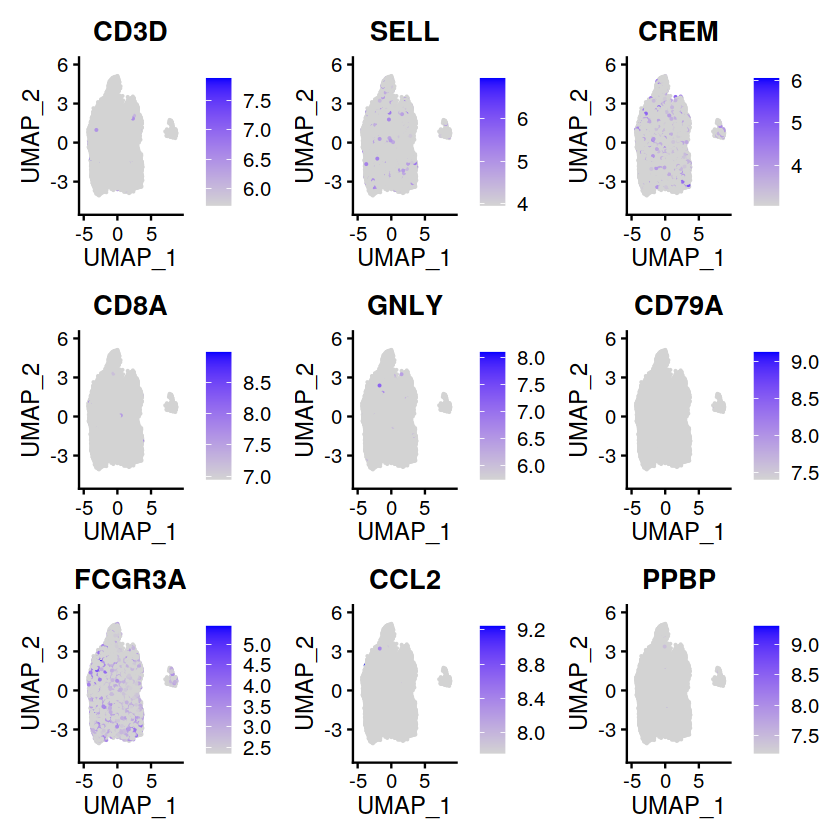

In [25]:
FeaturePlot(integrated, features = c("CD3D", "SELL", "CREM", "CD8A", "GNLY", "CD79A", "FCGR3A", 
    "CCL2", "PPBP"), min.cutoff = "q9")

ggsave(file=file.path(outdir,"seuratImmuneEmbed.png"))


Warning message in FetchData(object = object, vars = features, cells = cells):
"The following requested variables were not found: MIR155HG"
Saving 6.67 x 6.67 in image



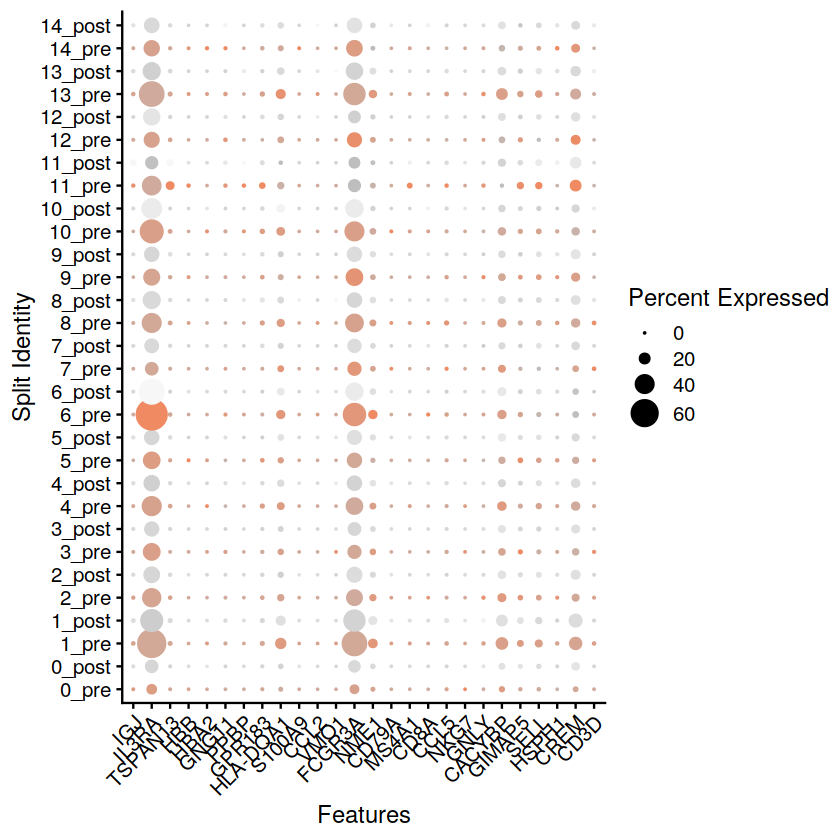

In [26]:
markers.to.plot <- c("CD3D", "CREM", "HSPH1", "SELL", "GIMAP5", "CACYBP", "GNLY", "NKG7", "CCL5", 
    "CD8A", "MS4A1", "CD79A", "MIR155HG", "NME1", "FCGR3A", "VMO1", "CCL2", "S100A9", "HLA-DQA1", 
    "GPR183", "PPBP", "GNG11", "HBA2", "HBB", "TSPAN13", "IL3RA", "IGJ")
DotPlot(integrated, features = rev(markers.to.plot), dot.scale = 8, cols=clrs,  
    split.by = "orig.ident") + RotatedAxis()
ggsave(file=file.path(outdir,"seuratImmuneDotPlot.png"))

### Immune markers taken from Dawn Lin et al Flt3l paper

Warning message in FetchData(object = object, vars = features, cells = cells):
"The following requested variables were not found: SLAMF2"
Saving 6.67 x 6.67 in image



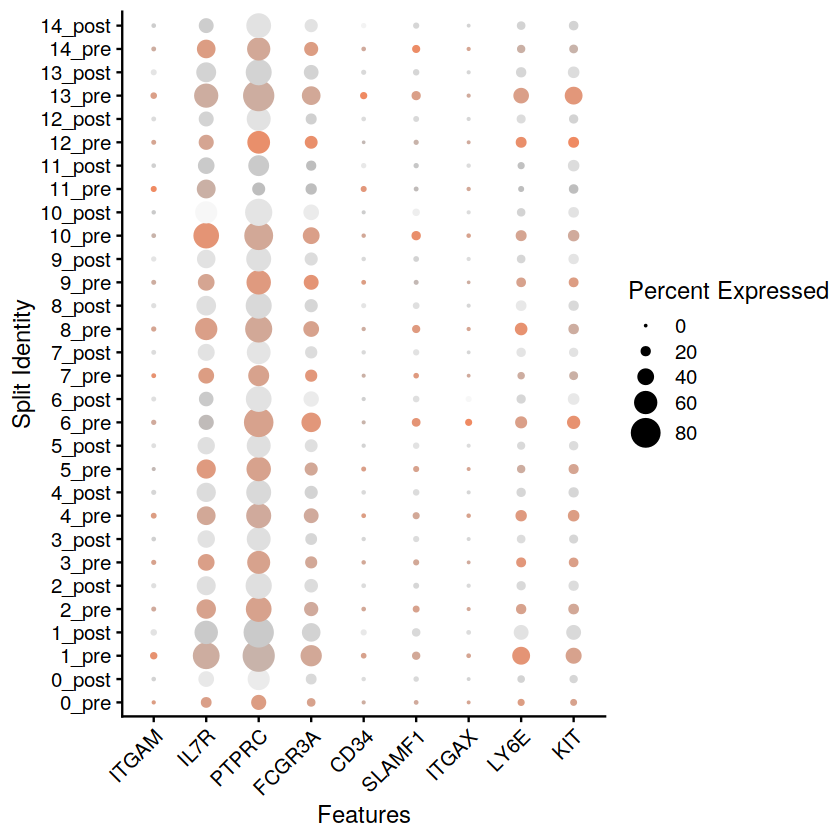

In [27]:
immune.markers = c('KIT',
                   'LY6E',
                   'ITGAX',
                   'SLAMF1',
                   'CD34',
                   'FCGR3A',
                   'PTPRC',
                   'SLAMF2',
                   'IL7R',
                   'ITGAM')

DotPlot(integrated, features = rev(immune.markers), dot.scale = 8, 
        cols = clrs,
    split.by = "orig.ident") + RotatedAxis()
ggsave(file=file.path(outdir,"linImmuneDotPlot.png"))

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: SLAMF2"
Saving 6.67 x 6.67 in image



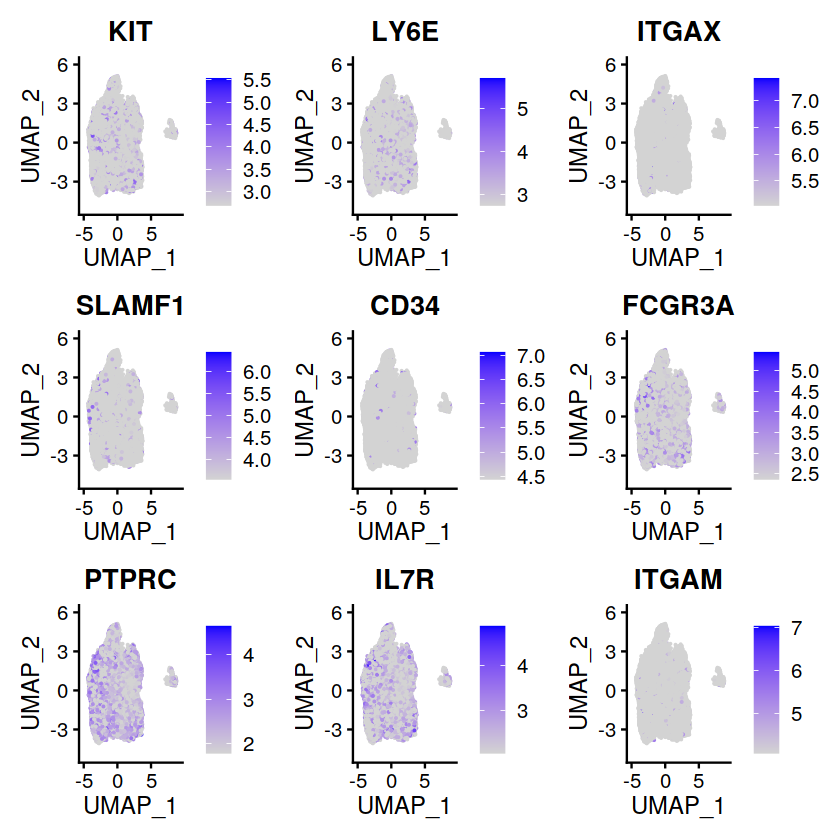

In [28]:
FeaturePlot(integrated, features = immune.markers, min.cutoff = "q9")
ggsave(file=file.path(outdir,"linImmuneEmbed.png"))

## Conserved markers to help identify cell type

In [29]:
topMarkers = c()
for (i in cluster.ids){ #or however many clusters you have
try({
    print(paste("cluster", i))
    cons.markers <- FindConservedMarkers(integrated, ident.1 = i, 
                                         grouping.var = "orig.ident", verbose = TRUE)

    write.csv(cons.markers, file=file.path(cons_outdir,paste0("cluster_",i,".conservedOverStim.GeneActivity.csv")))
    print(paste('saved cluster', i))
    print(head(cons.markers))
    topMarkers = c(topMarkers, rownames(cons.markers)[1])
    print(topMarkers)
})
}

head(cons.markers)

[1] "cluster 0"


Testing group pre: (0) vs (1, 9, 10, 2, 6, 12, 4, 3, 14, 13, 7, 5, 8, 11)

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Testing group post: (0) vs (5, 1, 2, 7, 13, 11, 12, 3, 14, 8, 6, 4, 9, 10)



[1] "saved cluster 0"
                pre_p_val pre_avg_log2FC pre_pct.1 pre_pct.2 pre_p_val_adj
NDUFA11     5.345998e-219      -2.538969     0.039     0.608 1.069734e-214
AC104532.2  6.501380e-218      -2.501653     0.039     0.606 1.300926e-213
VMAC        5.200222e-220      -2.574309     0.036     0.605 1.040564e-215
FUT5        1.755913e-217      -2.398542     0.044     0.615 3.513582e-213
AC024592.12 1.755913e-217      -2.398542     0.044     0.615 3.513582e-213
TMEM256     1.193121e-197      -2.664360     0.030     0.560 2.387436e-193
               post_p_val post_avg_log2FC post_pct.1 post_pct.2 post_p_val_adj
NDUFA11     1.833694e-274       -2.272576      0.058      0.450  3.669222e-270
AC104532.2  9.338933e-273       -2.230615      0.061      0.452  1.868720e-268
VMAC        2.315861e-271       -2.229201      0.061      0.450  4.634038e-267
FUT5        2.033774e-269       -2.155813      0.066      0.456  4.069582e-265
AC024592.12 2.033774e-269       -2.155813      0.066      

Testing group pre: (1) vs (9, 0, 10, 2, 6, 12, 4, 3, 14, 13, 7, 5, 8, 11)

Testing group post: (1) vs (5, 0, 2, 7, 13, 11, 12, 3, 14, 8, 6, 4, 9, 10)



[1] "saved cluster 1"
             pre_p_val pre_avg_log2FC pre_pct.1 pre_pct.2 pre_p_val_adj
HECW2    6.340243e-151     -0.8464250     0.983     0.778 1.268683e-146
ZRANB3   1.265561e-108     -0.7695299     0.979     0.746 2.532388e-104
ICOSLG   8.027994e-105      0.5611776     0.413     0.139 1.606402e-100
DIRC3     6.182939e-99     -0.7594846     0.979     0.739  1.237206e-94
C19orf24 8.712089e-102      0.5125530     0.468     0.171  1.743289e-97
MKLN1     8.034139e-70     -0.6735626     0.953     0.703  1.607631e-65
            post_p_val post_avg_log2FC post_pct.1 post_pct.2 post_p_val_adj
HECW2    1.059796e-170      -0.6947641      0.964      0.843  2.120651e-166
ZRANB3   1.462806e-123      -0.6619038      0.925      0.788  2.927075e-119
ICOSLG    1.159844e-36       0.3332875      0.295      0.129   2.320848e-32
DIRC3    1.232622e-103      -0.5833806      0.950      0.774   2.466477e-99
C19orf24  2.596606e-59       0.5100965      0.379      0.149   5.195808e-55
MKLN1     9.602481

Testing group pre: (2) vs (1, 9, 0, 10, 6, 12, 4, 3, 14, 13, 7, 5, 8, 11)

Testing group post: (2) vs (5, 1, 0, 7, 13, 11, 12, 3, 14, 8, 6, 4, 9, 10)



[1] "saved cluster 2"
       pre_p_val pre_avg_log2FC pre_pct.1 pre_pct.2 pre_p_val_adj post_p_val
PCDHA1         0       2.153023     0.998     0.389             0          0
PCDHA2         0       2.163441     0.998     0.387             0          0
PCDHA3         0       2.779484     0.997     0.271             0          0
PCDHA4         0       2.800370     0.997     0.267             0          0
PCDHA5         0       2.827343     0.997     0.263             0          0
PCDHA6         0       2.835659     0.997     0.261             0          0
       post_avg_log2FC post_pct.1 post_pct.2 post_p_val_adj max_pval
PCDHA1        2.045296      0.995      0.261              0        0
PCDHA2        2.060614      0.995      0.258              0        0
PCDHA3        2.927593      0.994      0.145              0        0
PCDHA4        2.970122      0.994      0.142              0        0
PCDHA5        3.007762      0.994      0.138              0        0
PCDHA6        3.020845   

Testing group pre: (3) vs (1, 9, 0, 10, 2, 6, 12, 4, 14, 13, 7, 5, 8, 11)

Testing group post: (3) vs (5, 1, 0, 2, 7, 13, 11, 12, 14, 8, 6, 4, 9, 10)



[1] "saved cluster 3"
                pre_p_val pre_avg_log2FC pre_pct.1 pre_pct.2 pre_p_val_adj
VMAC        1.190683e-204       2.231622     0.995     0.485 2.382556e-200
AC104532.2  6.494018e-204       2.222934     0.995     0.487 1.299453e-199
NDUFA11     1.878091e-203       2.218941     0.995     0.489 3.758060e-199
FUT5        6.081285e-201       2.194122     0.995     0.496 1.216865e-196
AC024592.12 6.081285e-201       2.194122     0.995     0.496 1.216865e-196
TMEM256      9.703316e-48      -1.889910     0.084     0.499  1.941634e-43
               post_p_val post_avg_log2FC post_pct.1 post_pct.2 post_p_val_adj
VMAC         0.000000e+00        1.975640      0.994      0.328   0.000000e+00
AC104532.2   0.000000e+00        1.970654      0.994      0.329   0.000000e+00
NDUFA11      0.000000e+00        1.979358      0.995      0.327   0.000000e+00
FUT5         0.000000e+00        1.946703      0.996      0.333   0.000000e+00
AC024592.12  0.000000e+00        1.946703      0.996      

Testing group pre: (4) vs (1, 9, 0, 10, 2, 6, 12, 3, 14, 13, 7, 5, 8, 11)

Testing group post: (4) vs (5, 1, 0, 2, 7, 13, 11, 12, 3, 14, 8, 6, 9, 10)



[1] "saved cluster 4"
                   pre_p_val pre_avg_log2FC pre_pct.1 pre_pct.2 pre_p_val_adj
NDUFA13         0.000000e+00      3.3491925     0.992     0.170   0.00000e+00
CTC-260F20.3    0.000000e+00      3.3430918     0.995     0.171   0.00000e+00
YJEFN3          0.000000e+00      3.3390669     0.995     0.172   0.00000e+00
TSSK6          1.983094e-208      3.5486630     0.560     0.086  3.96817e-204
CTD-3105H18.18  1.071017e-03      0.3242819     0.307     0.259   1.00000e+00
CTD-3105H18.16  3.737840e-04      0.4169277     0.302     0.247   1.00000e+00
                 post_p_val post_avg_log2FC post_pct.1 post_pct.2
NDUFA13        0.000000e+00       3.7836861      0.993      0.074
CTC-260F20.3   0.000000e+00       3.7865722      0.995      0.074
YJEFN3         0.000000e+00       3.7753164      0.995      0.074
TSSK6          0.000000e+00       4.1520542      0.542      0.030
CTD-3105H18.18 7.598227e-16       0.5087694      0.260      0.168
CTD-3105H18.16 6.751261e-14       0.

Testing group pre: (5) vs (1, 9, 0, 10, 2, 6, 12, 4, 3, 14, 13, 7, 8, 11)

Testing group post: (5) vs (1, 0, 2, 7, 13, 11, 12, 3, 14, 8, 6, 4, 9, 10)



[1] "saved cluster 5"
                  pre_p_val pre_avg_log2FC pre_pct.1 pre_pct.2 pre_p_val_adj
RP11-637O19.3 9.162014e-199       2.820788     1.000     0.311 1.833319e-194
SYCP2L        2.240533e-192       2.753062     1.000     0.323 4.483307e-188
TMEM14B       2.130173e-190       2.820318     0.973     0.299 4.262475e-186
MAK            1.182075e-95       3.059460     0.536     0.127  2.365331e-91
AC104532.2     1.442551e-33      -1.762648     0.100     0.532  2.886544e-29
NDUFA11        7.045779e-33      -1.691655     0.103     0.533  1.409860e-28
                post_p_val post_avg_log2FC post_pct.1 post_pct.2 post_p_val_adj
RP11-637O19.3 0.000000e+00        2.498575      0.998      0.231   0.000000e+00
SYCP2L        0.000000e+00        2.415684      0.999      0.244   0.000000e+00
TMEM14B       0.000000e+00        2.587529      0.978      0.213   0.000000e+00
MAK           0.000000e+00        2.927311      0.526      0.087   0.000000e+00
AC104532.2    9.485826e-92       -2.085

Testing group pre: (6) vs (1, 9, 0, 10, 2, 12, 4, 3, 14, 13, 7, 5, 8, 11)

Testing group post: (6) vs (5, 1, 0, 2, 7, 13, 11, 12, 3, 14, 8, 4, 9, 10)



[1] "saved cluster 6"
                 pre_p_val pre_avg_log2FC pre_pct.1 pre_pct.2 pre_p_val_adj
HNF1B         0.000000e+00       3.563128     0.526     0.033  0.000000e+00
APMAP         6.629462e-91       1.735925     0.545     0.151  1.326555e-86
IRF9         9.695652e-189       4.495519     0.211     0.007 1.940100e-184
SYNRG         6.402169e-84       1.834383     0.460     0.115  1.281074e-79
RP11-468E2.4 9.709058e-168       4.146775     0.219     0.010 1.942782e-163
STOX1         1.127063e-57       1.671072     0.414     0.126  2.255253e-53
                post_p_val post_avg_log2FC post_pct.1 post_pct.2 post_p_val_adj
HNF1B         0.000000e+00        3.566639      0.394      0.030   0.000000e+00
APMAP        3.130729e-233        2.250293      0.490      0.097  6.264588e-229
IRF9         4.053716e-169        4.217061      0.110      0.005  8.111485e-165
SYNRG        1.803715e-176        2.107603      0.419      0.089  3.609234e-172
RP11-468E2.4 6.670269e-151        3.845247    

Testing group pre: (7) vs (1, 9, 0, 10, 2, 6, 12, 4, 3, 14, 13, 5, 8, 11)

Testing group post: (7) vs (5, 1, 0, 2, 13, 11, 12, 3, 14, 8, 6, 4, 9, 10)



[1] "saved cluster 7"
                    pre_p_val pre_avg_log2FC pre_pct.1 pre_pct.2 pre_p_val_adj
TMEM256         2.347681e-156       2.658386     0.988     0.455 4.697709e-152
TMEM256-PLSCR3  2.433660e-155       2.618714     0.996     0.475 4.869755e-151
C17orf61-PLSCR3 2.433660e-155       2.618714     0.996     0.475 4.869755e-151
NLGN2           1.387658e-147       2.519787     0.988     0.491 2.776703e-143
AC104532.2       5.918315e-51      -2.700353     0.015     0.535  1.184255e-46
NDUFA11          4.065186e-51      -2.631840     0.015     0.537  8.134438e-47
                  post_p_val post_avg_log2FC post_pct.1 post_pct.2
TMEM256         0.000000e+00        2.194719      0.988      0.298
TMEM256-PLSCR3  0.000000e+00        2.120925      0.997      0.317
C17orf61-PLSCR3 0.000000e+00        2.120925      0.997      0.317
NLGN2           0.000000e+00        2.037479      0.988      0.331
AC104532.2      4.734569e-97       -2.557512      0.021      0.410
NDUFA11         5.67754

Testing group pre: (8) vs (1, 9, 0, 10, 2, 6, 12, 4, 3, 14, 13, 7, 5, 11)

Testing group post: (8) vs (5, 1, 0, 2, 7, 13, 11, 12, 3, 14, 6, 4, 9, 10)



[1] "saved cluster 8"
                    pre_p_val pre_avg_log2FC pre_pct.1 pre_pct.2 pre_p_val_adj
TMEM256         4.600302e-114       1.276076     0.982     0.454 9.205203e-110
TMEM256-PLSCR3  4.394777e-110       1.220441     0.989     0.474 8.793949e-106
C17orf61-PLSCR3 4.394777e-110       1.220441     0.989     0.474 8.793949e-106
NLGN2           6.782486e-104       1.159283     0.986     0.490  1.357175e-99
NDUFA11          3.697264e-97       1.155437     0.971     0.498  7.398225e-93
VMAC             5.683323e-98       1.166196     0.971     0.495  1.137233e-93
                   post_p_val post_avg_log2FC post_pct.1 post_pct.2
TMEM256          0.000000e+00        1.675724      0.967      0.300
TMEM256-PLSCR3   0.000000e+00        1.609997      0.983      0.319
C17orf61-PLSCR3  0.000000e+00        1.609997      0.983      0.319
NLGN2            0.000000e+00        1.542955      0.977      0.332
NDUFA11         1.692281e-294        1.434262      0.989      0.356
VMAC            1

Testing group pre: (9) vs (1, 0, 10, 2, 6, 12, 4, 3, 14, 13, 7, 5, 8, 11)

Testing group post: (9) vs (5, 1, 0, 2, 7, 13, 11, 12, 3, 14, 8, 6, 4, 10)



[1] "saved cluster 9"
                 pre_p_val pre_avg_log2FC pre_pct.1 pre_pct.2 pre_p_val_adj
LST3         1.074614e-212       3.710795     0.967     0.164 2.150302e-208
SLCO1B7      4.771084e-212       3.705110     0.967     0.165 9.546939e-208
SLCO1B3      4.122438e-210       3.676305     0.967     0.167 8.248998e-206
RP11-125O5.2  1.513073e-11       2.156105     0.215     0.084  3.027660e-07
PCDHA11       2.058995e-10      -1.571394     0.077     0.308  4.120049e-06
PCDHA12       6.885489e-11      -1.709473     0.066     0.298  1.377786e-06
               post_p_val post_avg_log2FC post_pct.1 post_pct.2 post_p_val_adj
LST3         0.000000e+00        2.938957      0.977      0.157   0.000000e+00
SLCO1B7      0.000000e+00        2.928736      0.977      0.158   0.000000e+00
SLCO1B3      0.000000e+00        2.920360      0.978      0.159   0.000000e+00
RP11-125O5.2 1.633013e-53        1.647878      0.237      0.083   3.267658e-49
PCDHA11      3.663621e-34       -1.693754      0.06

Testing group pre: (10) vs (1, 9, 0, 2, 6, 12, 4, 3, 14, 13, 7, 5, 8, 11)

Testing group post: (10) vs (5, 1, 0, 2, 7, 13, 11, 12, 3, 14, 8, 6, 4, 9)



[1] "saved cluster 10"
                pre_p_val pre_avg_log2FC pre_pct.1 pre_pct.2 pre_p_val_adj
ESR2         5.382095e-60       1.303698     0.623     0.222  1.076957e-55
RHBDD1       7.226878e-89       1.977170     0.504     0.113  1.446098e-84
LPA          2.486026e-33       1.003422     0.532     0.237  4.974537e-29
RP11-12J10.3 2.625191e-54       2.054245     0.292     0.059  5.253007e-50
DMRTC1       3.878183e-60       1.302309     0.585     0.197  7.760243e-56
METTL10      4.550208e-55       2.881483     0.173     0.021  9.104966e-51
               post_p_val post_avg_log2FC post_pct.1 post_pct.2 post_p_val_adj
ESR2         8.918951e-90        1.383974      0.494      0.189   1.784682e-85
RHBDD1       1.404999e-89        1.712343      0.365      0.113   2.811403e-85
LPA          9.246533e-77        1.299239      0.488      0.205   1.850231e-72
RP11-12J10.3 3.840867e-72        1.958299      0.245      0.065   7.685574e-68
DMRTC1       1.721734e-71        1.290394      0.437     

Testing group pre: (11) vs (1, 9, 0, 10, 2, 6, 12, 4, 3, 14, 13, 7, 5, 8)

Testing group post: (11) vs (5, 1, 0, 2, 7, 13, 12, 3, 14, 8, 6, 4, 9, 10)



[1] "saved cluster 11"
          pre_p_val pre_avg_log2FC pre_pct.1 pre_pct.2 pre_p_val_adj
MLLT4  2.433568e-12       2.598615     0.232     0.042  4.869570e-08
TMTC1  4.876031e-04       1.309162     0.250     0.113  1.000000e+00
SHISA6 3.206546e-10       2.290260     0.250     0.058  6.416298e-06
THRB   2.838949e-04       1.246058     0.304     0.147  1.000000e+00
SYNPR  5.672457e-07       1.564798     0.339     0.130  1.135059e-02
CCSER2 9.781190e-11       2.166346     0.286     0.070  1.957216e-06
          post_p_val post_avg_log2FC post_pct.1 post_pct.2 post_p_val_adj
MLLT4  2.648136e-178        2.512634      0.241      0.033  5.298920e-174
TMTC1  3.826521e-161        1.816342      0.432      0.113  7.656869e-157
SHISA6 3.682936e-157        2.185162      0.301      0.059  7.369554e-153
THRB   3.286738e-156        1.676919      0.470      0.133  6.576764e-152
SYNPR  1.367619e-155        1.708551      0.441      0.118  2.736606e-151
CCSER2 3.702553e-154        2.068959      0.303   

Testing group pre: (12) vs (1, 9, 0, 10, 2, 6, 4, 3, 14, 13, 7, 5, 8, 11)

Testing group post: (12) vs (5, 1, 0, 2, 7, 13, 11, 3, 14, 8, 6, 4, 9, 10)



[1] "saved cluster 12"
               pre_p_val pre_avg_log2FC pre_pct.1 pre_pct.2 pre_p_val_adj
HPR        2.590832e-117       3.333732     0.985     0.259 5.184255e-113
HP         6.987925e-116       3.344850     0.970     0.251 1.398284e-111
TXNL4B     3.056308e-114       3.286215     0.985     0.268 6.115672e-110
AC104532.2  1.293687e-12      -1.263811     0.144     0.523  2.588667e-08
VMAC        1.559135e-12      -1.258156     0.144     0.521  3.119828e-08
NDUFA11     1.052171e-12      -1.267484     0.144     0.525  2.105394e-08
             post_p_val post_avg_log2FC post_pct.1 post_pct.2 post_p_val_adj
HPR        0.000000e+00        2.845183      0.960      0.183   0.000000e+00
HP         0.000000e+00        2.888168      0.951      0.176   0.000000e+00
TXNL4B     0.000000e+00        2.782462      0.962      0.191   0.000000e+00
AC104532.2 2.894523e-26       -1.211466      0.154      0.397   5.791941e-22
VMAC       4.453872e-26       -1.208998      0.154      0.396   8.912197e-

Testing group pre: (13) vs (1, 9, 0, 10, 2, 6, 12, 4, 3, 14, 7, 5, 8, 11)

Testing group post: (13) vs (5, 1, 0, 2, 7, 11, 12, 3, 14, 8, 6, 4, 9, 10)



[1] "saved cluster 13"
        pre_p_val pre_avg_log2FC pre_pct.1 pre_pct.2 pre_p_val_adj post_p_val
PCDHGA2         0       4.040356         1     0.053             0          0
PCDHGA3         0       4.328942         1     0.042             0          0
PCDHGB1         0       6.282645         1     0.009             0          0
PCDHGA4         0       6.485530         1     0.008             0          0
PCDHGB2         0       6.651810         1     0.007             0          0
PCDHGA5         0       6.780570         1     0.006             0          0
        post_avg_log2FC post_pct.1 post_pct.2 post_p_val_adj max_pval
PCDHGA2        4.618265          1      0.032              0        0
PCDHGA3        5.076716          1      0.022              0        0
PCDHGB1        6.576288          1      0.007              0        0
PCDHGA4        6.809740          1      0.005              0        0
PCDHGB2        6.924499          1      0.005              0        0
PCDHGA5    

Testing group pre: (14) vs (1, 9, 0, 10, 2, 6, 12, 4, 3, 13, 7, 5, 8, 11)

Testing group post: (14) vs (5, 1, 0, 2, 7, 13, 11, 12, 3, 8, 6, 4, 9, 10)



[1] "saved cluster 14"
                   pre_p_val pre_avg_log2FC pre_pct.1 pre_pct.2 pre_p_val_adj
CCDC169-SOHLH2 1.257114e-156      3.6582853     0.993     0.194 2.515484e-152
SOHLH2         1.544588e-156      3.6571915     0.993     0.194 3.090720e-152
CCDC169        6.814997e-155      3.6884564     0.958     0.178 1.363681e-150
VMAC            1.870901e-06     -0.7981002     0.261     0.519  3.743672e-02
AC104532.2      5.018397e-06     -0.6963553     0.268     0.521  1.004181e-01
NDUFA11         3.710710e-06     -0.7766777     0.268     0.523  7.425131e-02
                 post_p_val post_avg_log2FC post_pct.1 post_pct.2
CCDC169-SOHLH2 0.000000e+00       3.1156624      0.989      0.145
SOHLH2         0.000000e+00       3.1137264      0.989      0.146
CCDC169        0.000000e+00       3.2251194      0.963      0.130
VMAC           1.590232e-15      -0.9534522      0.190      0.393
AC104532.2     3.559926e-15      -0.9273880      0.193      0.394
NDUFA11        3.822436e-15      -0

,pre_p_val,pre_avg_log2FC,pre_pct.1,pre_pct.2,pre_p_val_adj,post_p_val,post_avg_log2FC,post_pct.1,post_pct.2,post_p_val_adj,max_pval,minimump_p_val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CCDC169-SOHLH2,1.257114e-156,3.6582853,0.993,0.194,2.515484e-152,0.000000e+00,3.1156624,0.989,0.145,0.000000e+00,1.257114e-156,0.000000e+00
SOHLH2,1.544588e-156,3.6571915,0.993,0.194,3.090720e-152,0.000000e+00,3.1137264,0.989,0.146,0.000000e+00,1.544588e-156,0.000000e+00
CCDC169,6.814997e-155,3.6884564,0.958,0.178,1.363681e-150,0.000000e+00,3.2251194,0.963,0.130,0.000000e+00,6.814997e-155,0.000000e+00
VMAC,1.870901e-06,-0.7981002,0.261,0.519,3.743672e-02,1.590232e-15,-0.9534522,0.190,0.393,3.182053e-11,1.870901e-06,3.180463e-15
AC104532.2,5.018397e-06,-0.6963553,0.268,0.521,1.004181e-01,3.559926e-15,-0.9273880,0.193,0.394,7.123412e-11,5.018397e-06,7.119852e-15
NDUFA11,3.710710e-06,-0.7766777,0.268,0.523,7.425131e-02,3.822436e-15,-0.9384805,0.193,0.393,7.648693e-11,3.710710e-06,7.644871e-15


In [30]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/isshamie/miniconda3/envs/mttrace/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] future_1.22.1             RColorBrewer_1.1-2       
 [3] metap_1.5                 cowplot_1.1.1            
 [5] magrittr_2.0.1            data.table_1.14.2        
 [7] patchwork_1.1.1           ggplot2_3.3.5            
 [9] EnsDb.Hsapiens.v75_2.99.0 ensembldb_2.16.4  